# Migration characteristics

In [1]:
import pandas as pd, numpy as np

! whoami
! date

zmbc
Thu Sep 29 09:53:38 PDT 2022


In [2]:
acs = pd.read_hdf('../../data/acs_2020_5yr.hdf', key='acs')

In [3]:
len(acs)

15441673

In [4]:
acs.PUMA.nunique()

982

In [5]:
acs['immigrant'] = (acs.MIG == 2).astype(int)
acs['immigrant_ref_person'] = ((acs.RELSHIPP == 20) & (acs.immigrant == 1)).astype(int)

## Sample size considerations

How do we determine if these sample sizes are "big enough"?
Clearly, in the extreme case, some PUMAs will receive 0 immigration of a given type.
Or when there is only 1 ACS respondent to sample from, a PUMA will receive immigration only of exact clones.
But it is unclear whether this is actually a problem/whether it would be better to randomly assign PUMAs to immigrants,
given that immigration rates vary quite a bit by PUMA.

This could lead to some especially hard PRL, given that people who are nearly identical (age will vary) will
tend to accumulate, which seems like a significant downside of the nonparametric resampling approach.

In [6]:
def histogram(series, xlabel, ylabel, bins='max'):
    if bins == 'max':
        bins = series.max()
    a = series.hist(bins=bins)
    a.set_xlabel(xlabel)
    a.set_ylabel(ylabel)
    return a

<AxesSubplot:xlabel='Number of recent immigrants', ylabel='Count of PUMAs'>

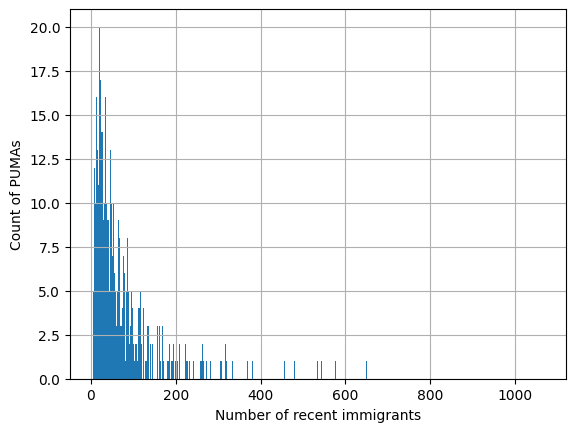

In [7]:
histogram(
    acs.groupby('PUMA').agg({'immigrant': 'sum', 'PWGTP': 'sum'}).immigrant,
    'Number of recent immigrants',
    'Count of PUMAs',
)

In [8]:
acs.groupby('PUMA').agg({'immigrant': 'sum', 'PWGTP': 'sum'}).immigrant.min()

4

<AxesSubplot:xlabel='Number of recent immigrant reference people', ylabel='Count of PUMAs'>

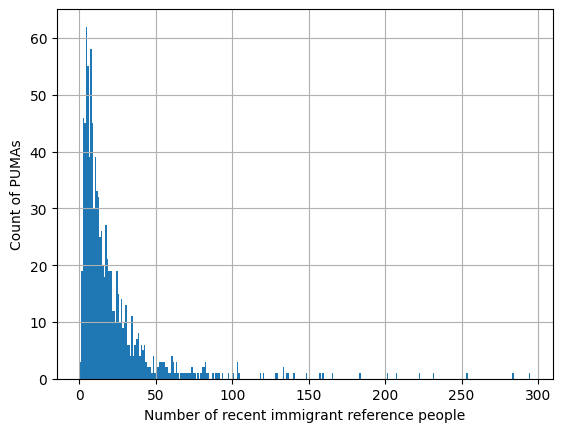

In [9]:
histogram(
    acs.groupby('PUMA').agg({'immigrant_ref_person': 'sum', 'PWGTP': 'sum'}).immigrant_ref_person,
    'Number of recent immigrant reference people',
    'Count of PUMAs',
)

In [10]:
acs.groupby('PUMA').agg({'immigrant_ref_person': 'sum', 'PWGTP': 'sum'}).immigrant_ref_person.min()

0

<AxesSubplot:xlabel='Rate of recent immigrants per 1,000 people', ylabel='Count of PUMAs'>

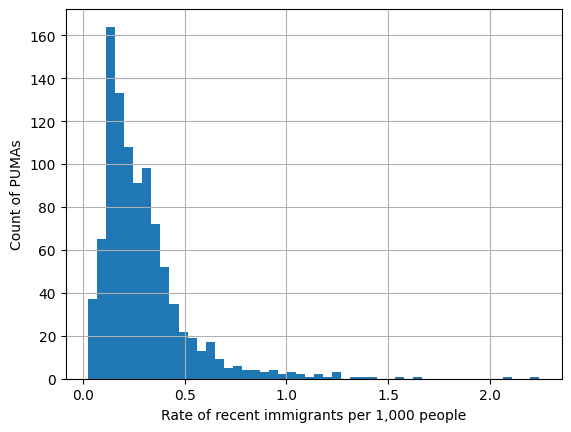

In [11]:
histogram(
    acs.groupby('PUMA').agg({'immigrant': 'sum', 'PWGTP': 'sum'}).assign(proportion=lambda x: x.immigrant / x.PWGTP * 1_000).proportion,
    'Rate of recent immigrants per 1,000 people',
    'Count of PUMAs',
    bins=50
)

<AxesSubplot:xlabel='Rate of recent immigrant reference people per 1,000 people', ylabel='Count of PUMAs'>

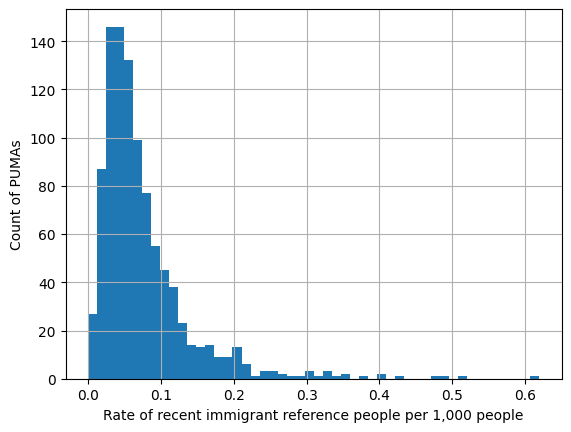

In [12]:
histogram(
    acs.groupby('PUMA').agg({'immigrant_ref_person': 'sum', 'PWGTP': 'sum'}).assign(proportion=lambda x: x.immigrant_ref_person / x.PWGTP * 1_000).proportion,
    'Rate of recent immigrant reference people per 1,000 people',
    'Count of PUMAs',
    bins=50
)